# Binary Classification of Cats and Dogs Pictures

## Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Importing data
ds_train = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode = 'binary',
    interpolation='nearest',
    image_size = [256,256],
    batch_size=32,
    shuffle =True,
)

ds_valid = image_dataset_from_directory(
    'test',
    labels='inferred',
    label_mode = 'binary',
    interpolation='nearest',
    image_size = [256,256],
    batch_size=32,
    shuffle =True, 
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


### Visualization

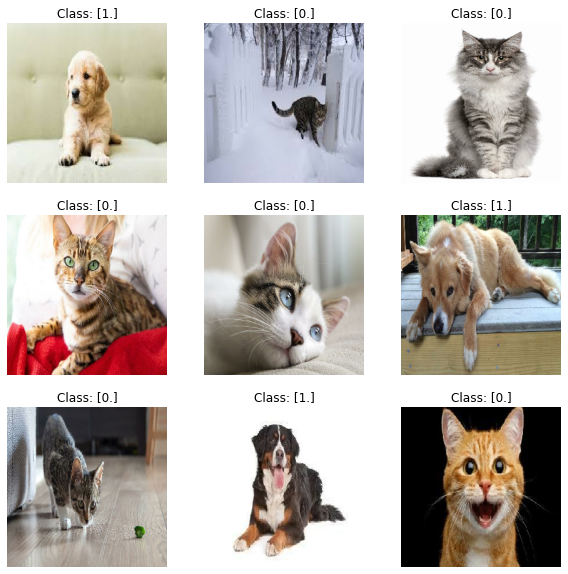

In [3]:
import matplotlib.pyplot as plt

# Selecting images and their respective labels
for images,labels in ds_train.take(1):

    # Creating figure of 10x10 (inches)
    plt.figure(figsize=(10,10))

    # Itering through images and plotting them
    ## uint8 ensures treatment as 8-bit integers
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis('off')

    plt.show()



## Data Preparation

In [16]:
# Defining function for treating images as float data
def convert_to_float(image,label):
    image = tf.image.convert_image_dtype(image,dtype=tf.float32)
    return image,label

# Optimizing CPU usage
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Converting images
## Storing data in cache memory
### Optimizing data availabilty
ds_train = (
    ds_train.map(convert_to_float).cache().prefetch(buffer_size = AUTOTUNE)
)

ds_valid = (
    ds_valid.map(convert_to_float).cache().prefetch(buffer_size = AUTOTUNE)
)

## Architecture of the Convolutional Neural Network

Here, the author opted for implementing a convolutional neural network using Keras' sequential model. *(Why a convolutional neural network and why apply a sequential model?)*

On what regards the convolutional layers, they are 3 and present 2D dimensions, whilst their amount of neurons are 32,64 and 128, respectively, their convolutional kernel size is 5x5 and they are activated through an Rectified Linear Unit function. One should also note that the pictures' amount of pixels considered are 64x64 and their color channels are RGB.

As for the fourth layer, one will find a MaxPooling two-dimensional algorithm implemented for optimization through down-sampling. Afterwards, a flattening layer is applied in order to transition from spatial dimensions to fully connected layers, these being two dense layers of 128 and 1 neuron each, the 1 neuron dense layer being the responsible for providing the output through a sigmoid activation function. One shall also note that a dropout layer is added to the network to prevent overfitting before the output is provided.

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Defining the model
model = Sequential()

# Defining convolutional layers
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(Conv2D(128, (5,5), activation='relu'))

# Adding a layer for reducing spatial dimensions
model.add(MaxPooling2D(pool_size=(3,3)))

# Flatten for transitioning from size dimensions to fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 36992)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4735104   
                                                      

## Model Compilation

In this section, the model is compiled using the Adam optimizer for it being based on stochastic gradient descent algorithms, while its loss function is set to follow a binary crossentropy algorithm, which is optimal for binary classification task. Finally, in order to mensurate the model's accuracy, binary accuracy metric is implemented also for it being optimal for the present task.

In [18]:
# Setting seeds
tf.random.set_seed(1)
np.random.seed(1)

# Compiling model
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics = ['binary_accuracy']
)

# Fitting model
history = model.fit(
    ds_train,
    validation_data = ds_valid,
    epochs = 10,
    verbose=1
)

Epoch 1/10


9/9 [==============================] - 24s 2s/step - loss: 1.0289 - binary_accuracy: 0.4829 - val_loss: 0.6927 - val_binary_accuracy: 0.5357
Epoch 2/10
9/9 [==============================] - 23s 3s/step - loss: 0.6923 - binary_accuracy: 0.5206 - val_loss: 0.6938 - val_binary_accuracy: 0.5071
Epoch 3/10
9/9 [==============================] - 22s 2s/step - loss: 0.6909 - binary_accuracy: 0.5189 - val_loss: 0.6969 - val_binary_accuracy: 0.5143
Epoch 4/10
9/9 [==============================] - 23s 2s/step - loss: 0.6943 - binary_accuracy: 0.4901 - val_loss: 0.6949 - val_binary_accuracy: 0.4643
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 0.6839 - binary_accuracy: 0.5691 - val_loss: 0.6991 - val_binary_accuracy: 0.4714
Epoch 6/10
9/9 [==============================] - 22s 2s/step - loss: 0.6689 - binary_accuracy: 0.5907 - val_loss: 0.7084 - val_binary_accuracy: 0.4857
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.6790 - binary_accuracy: 0.5

## Visualizing Results

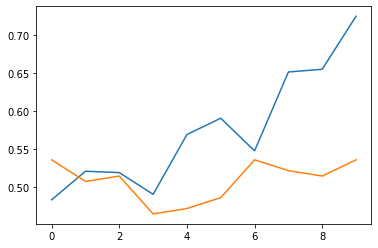

In [19]:
# Gráfico para visualizar os erros e accuracy
history.history.keys()
#evolução do erro, azul
plt.plot(history.history['binary_accuracy'])
#performance da rede
plt.plot(history.history['val_binary_accuracy'])

In [20]:
test_loss, test_acc = model.evaluate(ds_valid, verbose=1)

3/3 [==============================] - 1s 246ms/step - loss: 0.8302 - binary_accuracy: 0.5357


In [21]:
print(f'Acurácia: {test_acc} - Erro: {test_loss}')

Acurácia: 0.5357142686843872 - Erro: 0.8301761150360107
